In [5]:
from scipy import io as sio

node_connections = sio.loadmat('ConnectionMatrix.mat')
node_connections.keys()

dict_keys(['__header__', '__version__', '__globals__', 'NodeConnections', 'Heuristic'])

In [6]:
connection = node_connections.get('NodeConnections').A
connection

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
heuristic = node_connections.get('Heuristic')
heuristic

array([[  3,   2,   3,   2,   3,   3,   3,   3,   4,   3,   2,   3,   4,
          3,   3,   3,   4,   4,   3,   0,   3,   2,   4,   3,   3,   3,
          3,   2,   4,   3,   3,   2,   3,   3,   3,   3,   1,   5,   3,
          2,   3,   2,   3,   3,   4,   2,   2,   4,   3,   3,   5,   4,
          3,   5,   2,   3,   5,   3,   4,   4,   2,   4,   1,   3,   4,
          2,   4,   3,   2,   2,   2,   4,   3,   4, 100,   3,   3,   3,
          2,   2,   3,   2,   4,   3,   2,   3,   3,   2,   3,   4,   3,
          3,   3,   4,   3,   1,   1,   4,   3,   3]], dtype=uint8)

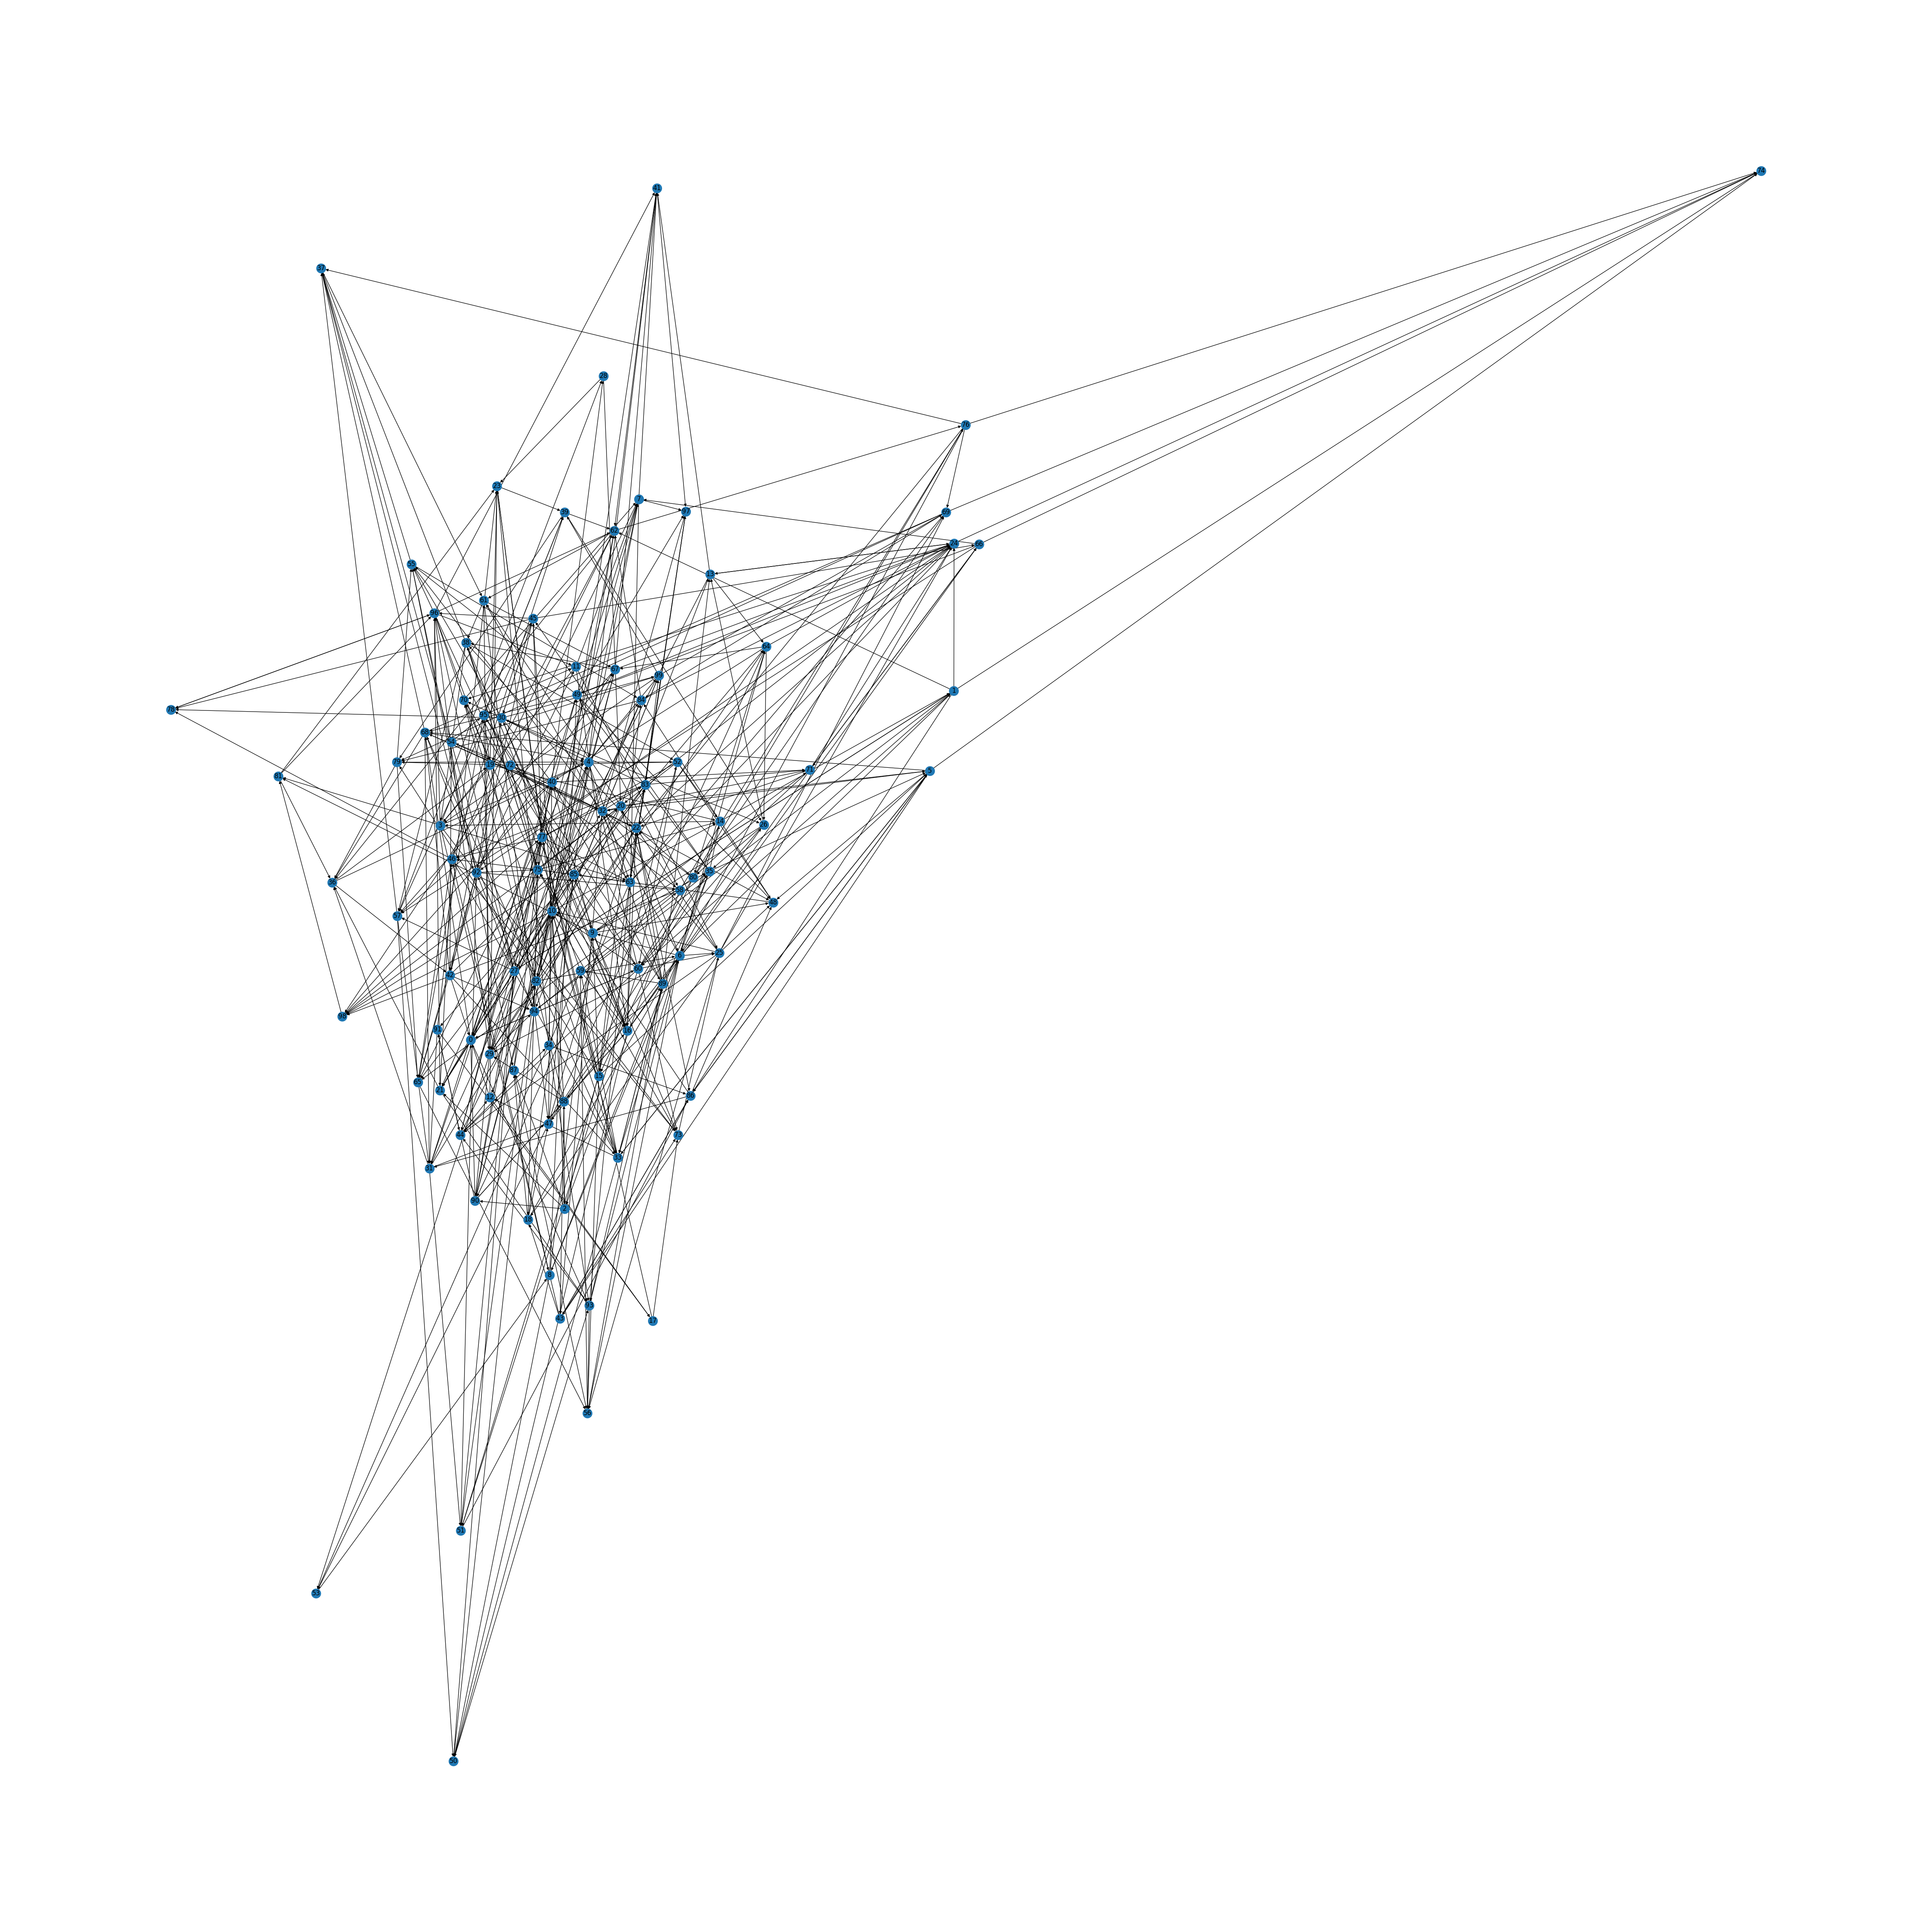

In [14]:
import numpy
import networkx
from matplotlib import pyplot

pyplot.figure(figsize=(50, 50))

G = networkx.from_numpy_array(numpy.matrix(connection), create_using=networkx.DiGraph)
networkx.draw(G, with_labels=True)
pyplot.show()

In [9]:
ALGORITHM_BFS = 0
ALGORITHM_DFS = 1
ALGORITHM_BEST_FIRST = 2
ALGORITHM_IFS = 3

DEPTH_LIMIT = 99


def backtrace(parent, start, goal, limit):
    path = [goal]
    while path[-1] != start:
        path.append(parent[path[-1]])
        if len(path) >= limit:
            return None
    path.reverse()
    return path


def search(adj_mat, start, goal, algorithm, use_visited, heuristic=None, queue=None, visited=None):
    visited = set()
    queue = [start]
    if algorithm == ALGORITHM_BFS:
        parent = {}
        while queue:
            for node in queue:
                if use_visited:
                    if node in visited:
                        continue
                    visited.add(node)
                if node == goal:
                    return backtrace(parent, start, goal, DEPTH_LIMIT)
                else:
                    if backtrace(parent, start, node, DEPTH_LIMIT) is None:
                        return
            new_queue = []
            for node in queue:
                for i in (adj_mat[node] == 1).nonzero()[-1]:
                    new_queue.append(i)
                    if not parent.get(i):
                        parent[i] = node
            queue = new_queue
    elif algorithm == ALGORITHM_DFS:
        visited.add(start)
        stack = [[start]]
        while stack:
            path = stack.pop()
            current = path[-1]
            if current == goal:
                return path
            for i in (adj_mat[current] == 1).nonzero()[-1]:
                if i in visited:
                    continue
                visited.add(i)
                new_path = list(path)
                new_path.append(i)
                stack.append(new_path)
        return None

In [10]:
import time

begin = time.time_ns()
print(f'Route: {search(connection, 1, 20, ALGORITHM_BFS, True)}')
end = time.time_ns()
print(f'Execution time: {end - begin} ns')

Route: [1, 86, 75, 20]
Execution time: 0 ns


In [11]:
begin = time.time_ns()
print(f'Route: {search(connection, 1, 20, ALGORITHM_BFS, False)}')
end = time.time_ns()
print(f'Execution time: {end - begin} ns')

Route: [1, 86, 75, 20]
Execution time: 0 ns


In [12]:
begin = time.time_ns()
print(f'Route: {search(connection, 1, 20, ALGORITHM_DFS, True)}')
end = time.time_ns()
print(f'DFS execution time: {end - begin} ns')

Route: [1, 94, 75, 20]
DFS execution time: 0 ns


In [13]:
begin = time.time_ns()
print(f'Route: {search(connection, 1, 20, ALGORITHM_DFS, False)}')
end = time.time_ns()
print(f'DFS execution time (without visited): {end - begin} ns')

Route: [1, 94, 75, 20]
DFS execution time (without visited): 0 ns
